In [30]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('paperPlot')

In [31]:
path = '/group/ag_cmb/scratch/dibakma/MSMRD/asym3D/MFPTS/'

In [52]:
mfpts_benchmark = pickle.load(open(path + 'mfpts_reference_10000runs_dt1E-3_SF2.0.p', 'r'))
mfpts_hybrid = pickle.load(open(path + '/hybrid/mfpts_10000_runs_lag0.05_R2.5_120files_240partitions.p'))

/home/mi/dibakma/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in divide
  from ipykernel import kernelapp as app


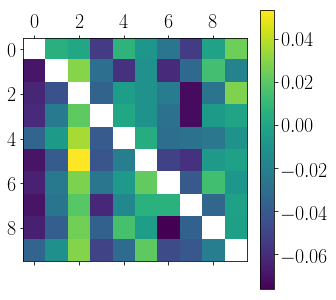

In [97]:
# Plot MFPTs errors
plt.matshow(((mfpts_hybrid - mfpts_benchmark)/mfpts_benchmark))
plt.colorbar()
#plt.clim([-0.1,0.075])
#plt.savefig('../Report/figs/periodicModel/3Dasym_MFPTS_R2.5_lag1.pdf')

In [99]:
print mfpts_hybrid[:,9], mfpts_benchmark[:,9]

[ 3.0765649  2.7985002  2.5446058  3.2178387  3.1463437  2.6328091
  3.1944361  3.1346181  2.6919413  0.       ] [ 3.0033683  2.8507102  2.4745639  3.2194564  3.1789409  2.6389771
  3.2218033  3.1410963  2.6987744  0.       ]


In [ ]:
fname = '../data/asym3D/MFPTS/hybrid/0to6_1runs_hybrid_box_dt0.01_exitCompensation.p'
MFPT = pickle.load( open( fname, "rb" ) )

In [91]:
fpts_benchmark = pickle.load(open(path + 'fpts_reference_10000runs_dt1E-3_SF2.0.p', 'r'))
fpts_benchmark = pickle.load(open('/group/ag_cmb/scratch/dibakma/MSMRD/asym3D/MFPTS/deprecated/8_bath_10000runs_0.001dt_2.0sf.p', 'r'))
fpts_hybrid = pickle.load(open(path + '/hybrid/fpts_10000_runs_lag0.05_R2.5_120files_240partitions.p'))

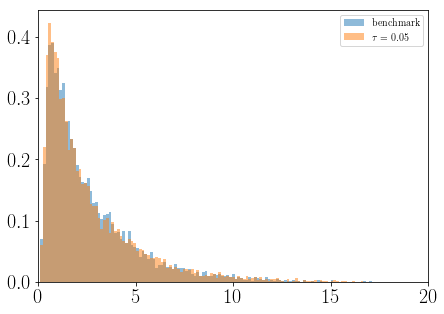

In [96]:
hist1 = plt.hist(fpts_benchmark, bins = 200, alpha=0.5, normed=True, label='benchmark')
hist2 = plt.hist(fpts_hybrid[8][9], bins = hist1[1], alpha=0.5, normed=True, label='$\\tau = 0.05$')
plt.xlim(0, 20)
plt.legend()
plt.savefig('../Report/figs/periodicModel/8toBathHistogram.pdf')

In [72]:
len(fpts_benchmark[0])

9

In [171]:
zeroonetransition = pickle.load(open('../data/asym3D/MFPTS/hybrid/0to1_10000runs_hybrid_box_lag20_200files_dt0.01_exitCompensation.p', 'r'))

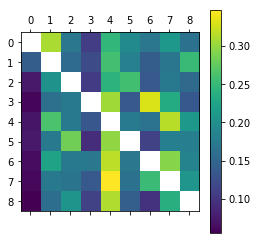

In [173]:
np.mean(zeroonetransition)/17.738058700004842

In [74]:
runs = 10000
# Load benchmark MFPTs from computed data
MFPTs_Benchmark = np.zeros((10,10))
for i in range(9):
    originState = str(i)
    for j in range(9):
        if (j != i):
            finalState = str(j)
            fname = '../data/asym3D/MFPTS/' + originState + 'to' + finalState + '_10000runs_0.001dt_2sf.p'
            MFPT = pickle.load( open( fname, "rb" ) )
            MFPTs_Benchmark[i,j] = np.mean(MFPT)
    MFPTs_Benchmark[i, 9] = np.mean(pickle.load(open('/group/ag_cmb/scratch/dibakma/MSMRD/asym3D/MFPTS/deprecated/'+str(i)+'_bath_'+str(runs)+'runs_0.001dt_2.0sf.p', 'r')))
    MFPTs_Benchmark[9,i] = np.mean(pickle.load(open('/group/ag_cmb/scratch/dibakma/MSMRD/asym3D/MFPTS/deprecated/bath_'+str(i)+'_'+str(runs)+'runs_0.001dt_2.0sf.p', 'r')))
# Load hybrid model MFPTs 
MFPTs_Hybrid = np.zeros((10,10))
for i in range(9):
    originState = str(i)
    for j in range(9):
        if (j != i):
            finalState = str(j)
            fname = '../data/asym3D/MFPTS/hybrid/' + originState + 'to' + finalState + '_10000runs_hybrid_box_lag0.01_124files_240partitions_dt0.001_exitCompensation.p'
            MFPT = pickle.load( open( fname, "rb" ) )
            MFPTs_Hybrid[i,j] = np.mean(MFPT)
    MFPTs_Hybrid[i, 9] = np.mean(pickle.load(open('../data/asym3D/MFPTS/hybrid/'+str(i)+'_to_bath_'+str(runs)+'runs_hybrid_box_dt0.001_lag0.01_124files_240partitions_exitCompensation.p', 'r')))
    MFPTs_Hybrid[9,i] = np.mean(pickle.load(open('../data/asym3D/MFPTS/hybrid/bath_to_'+str(i)+'_'+str(runs)+'runs_hybrid_box_dt0.001_lag0.01_124files_240partitions_exitCompensation.p', 'r')))

In [ ]:
open('/group/ag_cmb/scratch/dibakma/MSMRD/asym3D/MFPTS/deprecated/')

In [103]:
fpts = []
for i in range(9):
    fromi = []
    for j in range(9):
        if i != j:
            toj = pickle.load(open('/group/ag_cmb/scratch/dibakma/MSMRD/asym3D/MFPTS/deprecated/'+str(i)+'to'+str(j)+'_10000runs_0.001dt_2sf.p', 'r'))
            fromi.append(toj)
        else:
            fromi.append([0])
    tobath = pickle.load(open('/group/ag_cmb/scratch/dibakma/MSMRD/asym3D/MFPTS/deprecated/'+str(i)+'_bath_10000runs_0.001dt_2.0sf.p', 'r'))
    fromi.append(tobath)
    fpts.append(fromi)
frombath = []
for i in range(9):
    frombath.append(pickle.load(open('/group/ag_cmb/scratch/dibakma/MSMRD/asym3D/MFPTS/deprecated/bath_'+str(i)+'_10000runs_0.001dt_2.0sf.p', 'r')))
frombath.append([0])
fpts.append(frombath)

In [109]:
pickle.dump(fpts, open('/group/ag_cmb/scratch/dibakma/MSMRD/asym3D/MFPTS/fpts_reference_10000runs_dt1E-3_SF2.0_all.p', 'wa'))